In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [61]:
import requests

url = "http://iex.lewagon.com/stable/stock/aapl/chart/3m"
api_data = requests.get(url).json()

apple_stock_df = pd.DataFrame(api_data)
apple_stock_df.head(3)

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,182.68,182.93,180.30,181.27,2024-01-17,AAPL,47317433,HISTORICAL_PRICES,AAPL,,...,180.30,47317433,181.03,182.44,182.69,180.07,47317433,"Jan 17, 24",0.00,0.0000
1,188.63,189.14,185.83,186.09,2024-01-18,AAPL,78005754,HISTORICAL_PRICES,AAPL,,...,185.83,78005754,185.85,188.38,188.89,185.59,78005754,"Jan 18, 24",5.95,0.0326
2,191.56,191.95,188.82,189.33,2024-01-19,AAPL,68902985,HISTORICAL_PRICES,AAPL,,...,188.82,68902985,189.08,191.31,191.70,188.57,68902985,"Jan 19, 24",2.93,0.0155


In [62]:
#Convert the date column to a datetime object
apple_stock_df.date = pd.to_datetime(apple_stock_df.date, format="%Y-%m-%d")

In [63]:
apple_stock_df.head(3)

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,182.68,182.93,180.30,181.27,2024-01-17,AAPL,47317433,HISTORICAL_PRICES,AAPL,,...,180.30,47317433,181.03,182.44,182.69,180.07,47317433,"Jan 17, 24",0.00,0.0000
1,188.63,189.14,185.83,186.09,2024-01-18,AAPL,78005754,HISTORICAL_PRICES,AAPL,,...,185.83,78005754,185.85,188.38,188.89,185.59,78005754,"Jan 18, 24",5.95,0.0326
2,191.56,191.95,188.82,189.33,2024-01-19,AAPL,68902985,HISTORICAL_PRICES,AAPL,,...,188.82,68902985,189.08,191.31,191.70,188.57,68902985,"Jan 19, 24",2.93,0.0155


In [64]:
apple_stock_df.date.describe

<bound method NDFrame.describe of 0    2024-01-17
1    2024-01-18
2    2024-01-19
3    2024-01-22
4    2024-01-23
        ...    
58   2024-04-10
59   2024-04-11
60   2024-04-12
61   2024-04-15
62   2024-04-16
Name: date, Length: 63, dtype: datetime64[ns]>

In [65]:
#Set the date column as the index

apple_stock_df.set_index('date', inplace=True)

# idem apple_stock_df = apple_stock_df.set_index('date')

apple_stock_df.head(3)

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2024-01-17,182.68,182.93,180.30,181.27,2024-01-17,AAPL,47317433,HISTORICAL_PRICES,AAPL,,...,180.30,47317433,181.03,182.44,182.69,180.07,47317433,"Jan 17, 24",0.00,0.0000
2024-01-18,188.63,189.14,185.83,186.09,2024-01-18,AAPL,78005754,HISTORICAL_PRICES,AAPL,,...,185.83,78005754,185.85,188.38,188.89,185.59,78005754,"Jan 18, 24",5.95,0.0326
2024-01-19,191.56,191.95,188.82,189.33,2024-01-19,AAPL,68902985,HISTORICAL_PRICES,AAPL,,...,188.82,68902985,189.08,191.31,191.70,188.57,68902985,"Jan 19, 24",2.93,0.0155


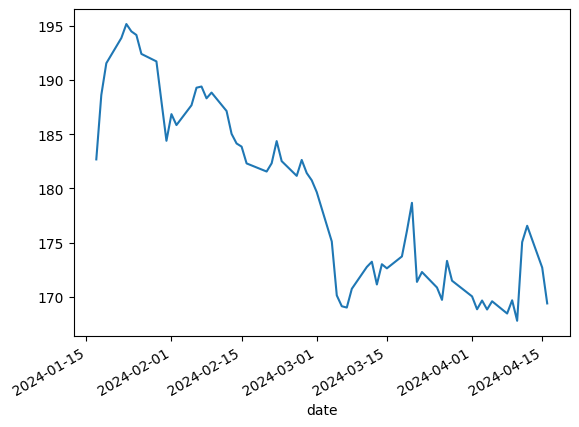

In [66]:
apple_stock_df.close.plot();

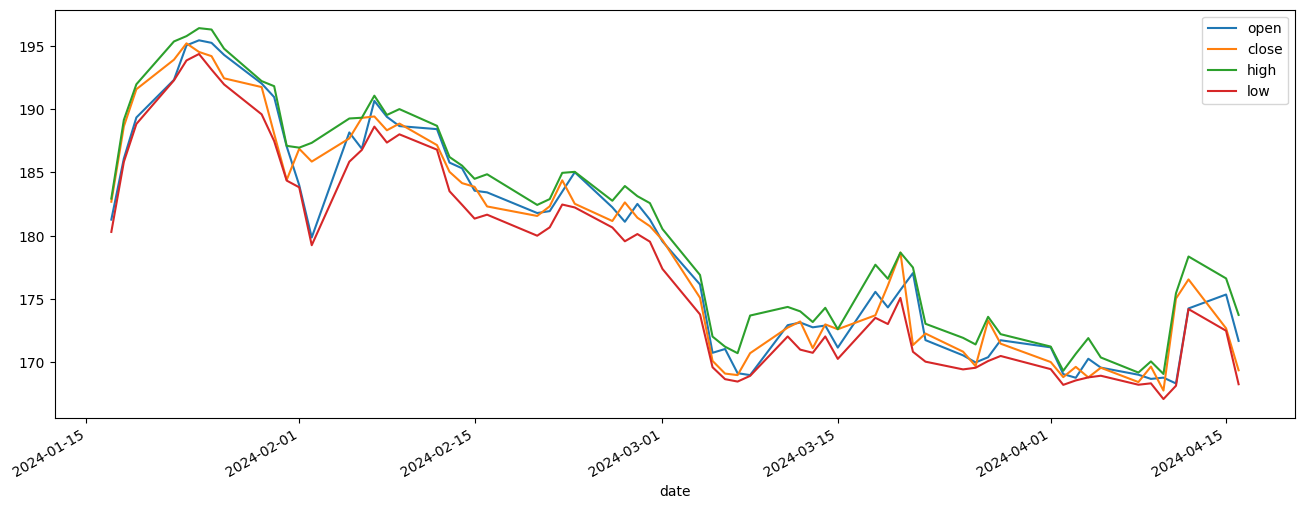

In [67]:
#figsize in inches (width, height)!

apple_stock_df[['open', 'close', 'high', 'low']].plot(figsize=(16,6));

**What is the URL for the:**

Amazon stock prices since last year?  
Facebook market cap?  
Apple research and development spendings quarterly?  
Last news about Tesla?  
Performance of the ‘Energy’ sector?  

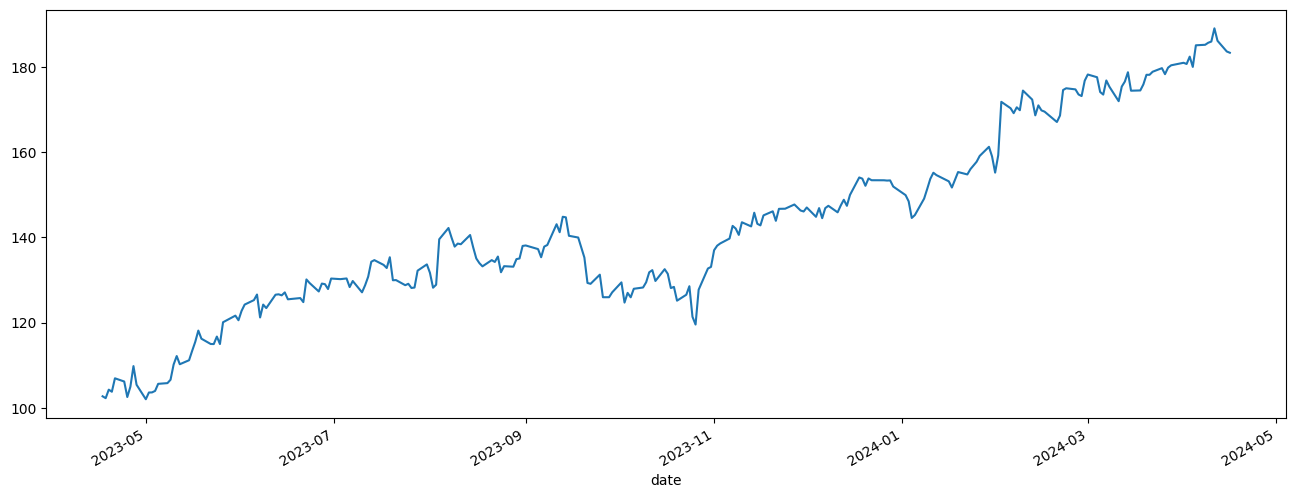

In [68]:
url2 = "http://iex.lewagon.com/stable/stock/amzn/chart/1y"
api_data = requests.get(url2).json()

amzn_stock_df = pd.DataFrame(api_data)
amzn_stock_df.date = pd.to_datetime(amzn_stock_df.date, format="%Y-%m-%d")
amzn_stock_df.set_index('date', inplace=True)
amzn_stock_df.close.plot(figsize=(16,6));

In [69]:
#url3 = "http://iex.lewagon.com/stable/stock/fb/stats"
url3 = "http://iex.lewagon.com/stable/stock/fb/quote/marketCap"
fb_mkt_cap = requests.get(url3).json()

fb_mkt_cap

561210585170

In [70]:
url4 = "http://iex.lewagon.com/stable/stock/aapl/financials"
#url4 = "http://iex.lewagon.com/stable/stock/aapl/income/"
appl_financials = requests.get(url4).json()

appl_financials['financials'][0]['researchAndDevelopment']
#appl_financials['income'][0]['researchAndDevelopment']

# appl_financials = pd.DataFrame(requests.get(url4).json()['income'])
# appl_financials[['researchAndDevelopment']]

7696000000

In [71]:
url5 = "http://iex.lewagon.com/stable/stock/tsla/news/last/1"
tsla_news = requests.get(url5).json()

tsla_news

[{'datetime': 1713387506000,
  'headline': 'Tesla wants shareholders to reinstate $56B Elon Musk pay package tossed by judge',
  'source': 'The Daily Record Maryland',
  'url': 'https://cloud.iexapis.com/v1/news/article/3ExHcBmLAAZryGydoL7STYvLpiTzQ441q9EoZdxt4WEQ',
  'summary': 'Tesla will ask shareholders to reinstate a $56 billion compensation package for CEO Elon Musk that was rejected by a judge in Delaware. The post Tesla wants shareholders to reinstate $56B Elon Musk pay package tossed by judge appeared first on Maryland Daily Record .',
  'related': 'TL0-GF,TL0-GM,TL0-GY,TL0-GH,TL0-GS,TL0-GI,TL0-GD,TL0-GB,TSLA,TSLA-QH',
  'image': 'https://cloud.iexapis.com/v1/news/image/3ExHcBmLAAZryGydoL7STYvLpiTzQ441q9EoZdxt4WEQ',
  'lang': 'en',
  'hasPaywall': False}]

In [72]:
url6 = "http://iex.lewagon.com/stable/stock/market/sector-performance"
sector_performances = pd.DataFrame(requests.get(url6).json())

sector_performances[sector_performances['name']=='Energy']

,type,name,symbol,performance,lastUpdated
6,sector,Energy,XLE,-0.00286,1713384000004


In [76]:
stocks = ['goog', 'meta', 'amzn', 'aapl', 'meli']
stocks_data = pd.DataFrame(columns=['date']+stocks)
for stock in stocks:
    url = f"http://iex.lewagon.com/stable/stock/{stock}/chart/1y"
    api_data = pd.DataFrame(requests.get(url).json())
    stocks_data[['date', stock]] = api_data[['date', 'close']]

stocks_data

,date,goog,meta,amzn,aapl,meli
0,2023-04-17,106.42,218.86,102.74,165.23,1314.74
1,2023-04-18,105.12,217.89,102.30,166.47,1321.47
2,2023-04-19,105.02,215.70,104.30,167.63,1308.29
3,2023-04-20,105.90,213.07,103.81,166.65,1293.77
4,2023-04-21,105.91,212.89,106.96,165.02,1281.92
...,...,...,...,...,...,...
247,2024-04-10,157.66,519.83,185.95,167.78,1478.00
248,2024-04-11,160.79,523.16,189.05,175.04,1507.56
249,2024-04-12,159.19,511.90,186.13,176.55,1444.14
250,2024-04-15,156.33,500.23,183.62,172.69,1415.88


<Axes: xlabel='date'>

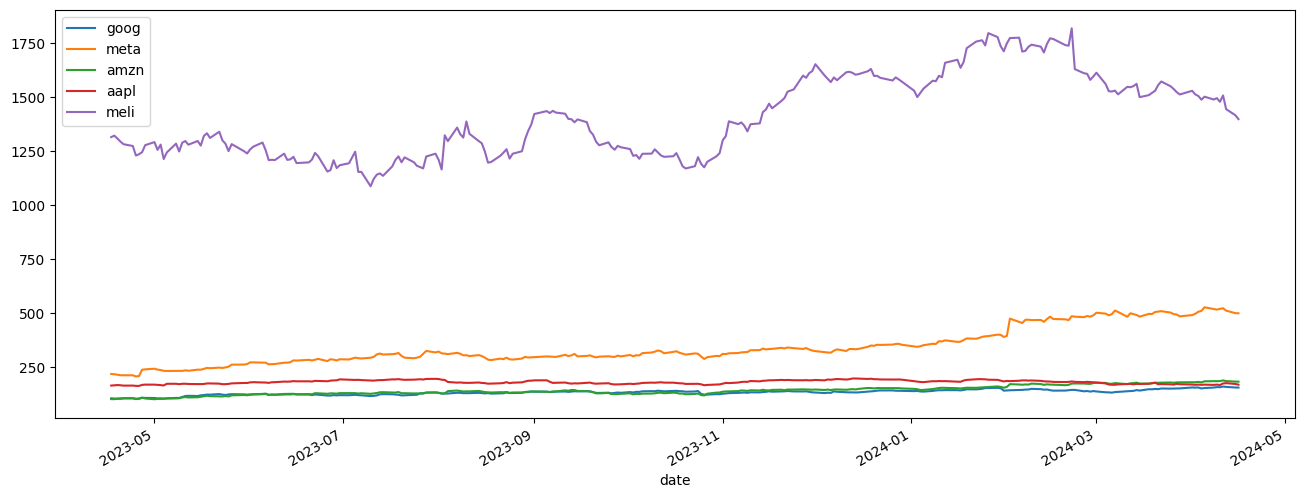

In [77]:
stocks_data.date = pd.to_datetime(stocks_data.date, format="%Y-%m-%d")
stocks_data.set_index('date', inplace=True)
stocks_data.plot(figsize=(16,6))

                goog      meta      amzn      aapl      meli
date                                                        
2023-04-17  1.000000  1.000000  1.000000  1.000000  1.000000
2023-04-18  0.987784  0.995568  0.995717  1.007505  1.005119
2023-04-19  0.986845  0.985562  1.015184  1.014525  0.995094
2023-04-20  0.995114  0.973545  1.010415  1.008594  0.984050
2023-04-21  0.995208  0.972722  1.041075  0.998729  0.975037


/tmp/ipykernel_73231/23724472.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return series/series[0]


<Axes: xlabel='date'>

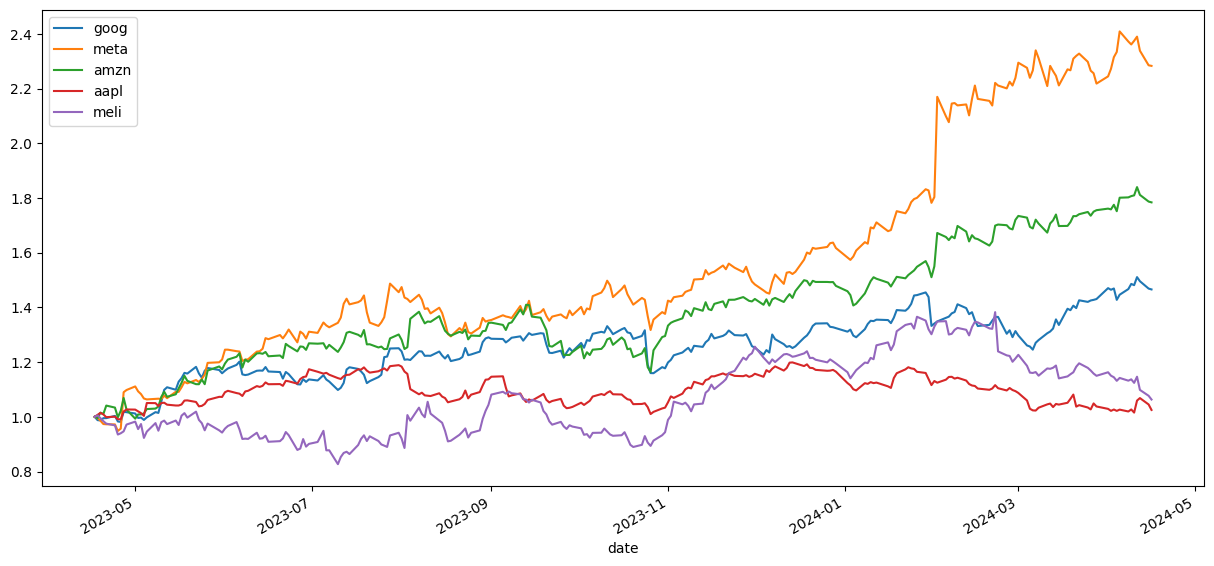

In [78]:
#normalization technique
def normalization(series):
    return series/series[0]

stocks_data_normalized = stocks_data.apply(normalization, axis=0)

print(stocks_data_normalized.head())
stocks_data_normalized.plot(figsize=(15,7))